Title : Data Analytics I (Linear Regression)

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset. Theobjective is topredict the valueof prices of thehouseusing the given features

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crime_rate  506 non-null    float64
 1   zn          506 non-null    float64
 2   indus       506 non-null    float64
 3   chas        506 non-null    int64  
 4   nox         506 non-null    float64
 5   rm          501 non-null    float64
 6   Age         506 non-null    float64
 7   Distance    506 non-null    float64
 8   rad         506 non-null    int64  
 9   tax         506 non-null    int64  
 10  ptratio     506 non-null    float64
 11  b           506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df['rm'] = df['rm'].fillna(df['rm'].mean())

In [7]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            0
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [8]:
df.describe()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


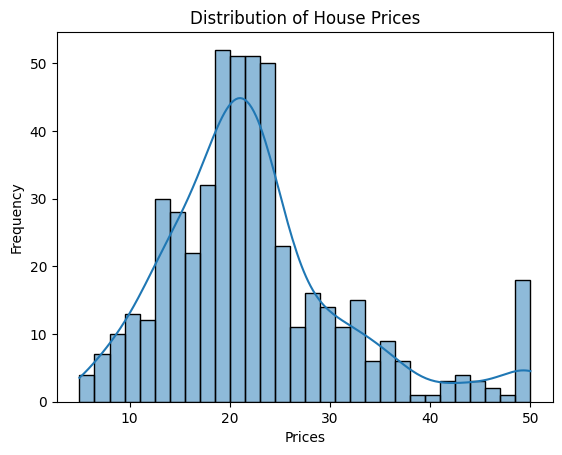

In [9]:
sns.histplot(df['medv'], bins=30, kde=True)  # kde=True adds the smooth curve like distplot
plt.title('Distribution of House Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()

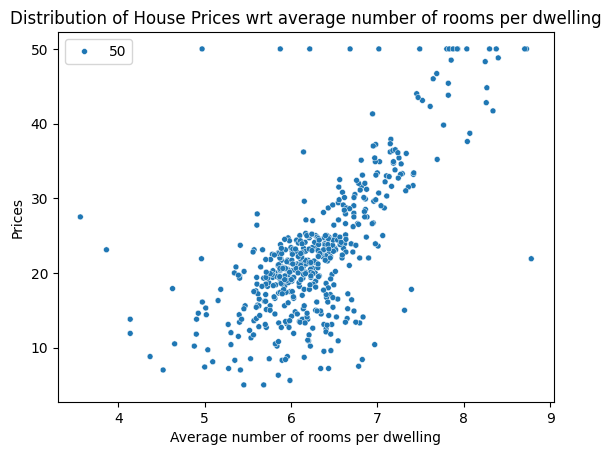

In [10]:
sns.scatterplot(x=df['rm'], y=df['medv'],size=50)
plt.title('Distribution of House Prices wrt average number of rooms per dwelling')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Prices')
plt.show()

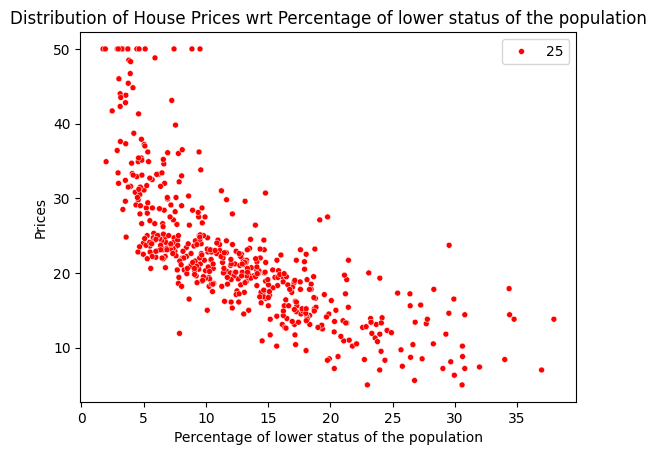

In [11]:
sns.scatterplot(x=df['lstat'], y=df['medv'],size=25, color='red')
plt.title('Distribution of House Prices wrt Percentage of lower status of the population')
plt.xlabel('Percentage of lower status of the population')
plt.ylabel('Prices')
plt.show()

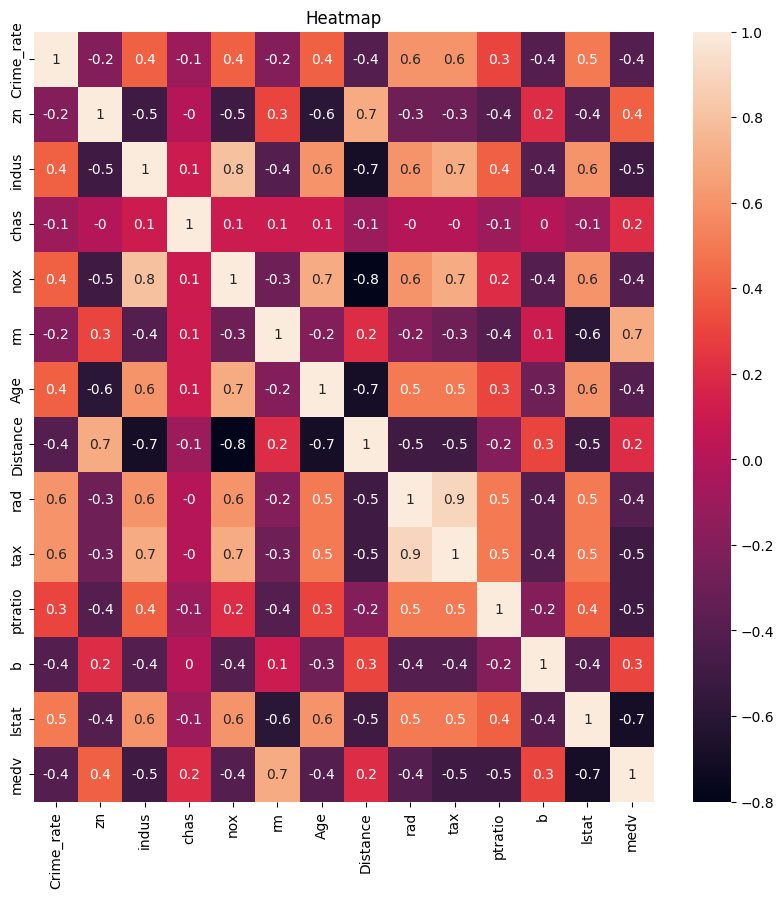

In [12]:
# correlation_matrix measures linear relationships between the variables
# value = ~1 strong positive corelation & value = ~(-1) strong negative corelation
correlation_matrix = df.corr().round(1)
# annot = True  to print values inside the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix,annot=True)
plt.title('Heatmap')
plt.show()

In [13]:
# Preparing the data for training the model
Y = df['medv']
X = df.drop(columns=['medv'])

In [14]:
# Split the data into training and testing model
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [15]:
x_train.shape

(404, 13)

In [16]:
x_test.shape

(102, 13)

In [17]:
# Standardize the data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [18]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [19]:
# Make predictions
y_pred = model.predict(x_test_scaled)

In [20]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 3.21
Mean Squared Error: 20.90
Root Mean Squared Error: 4.57
R-squared: 0.73


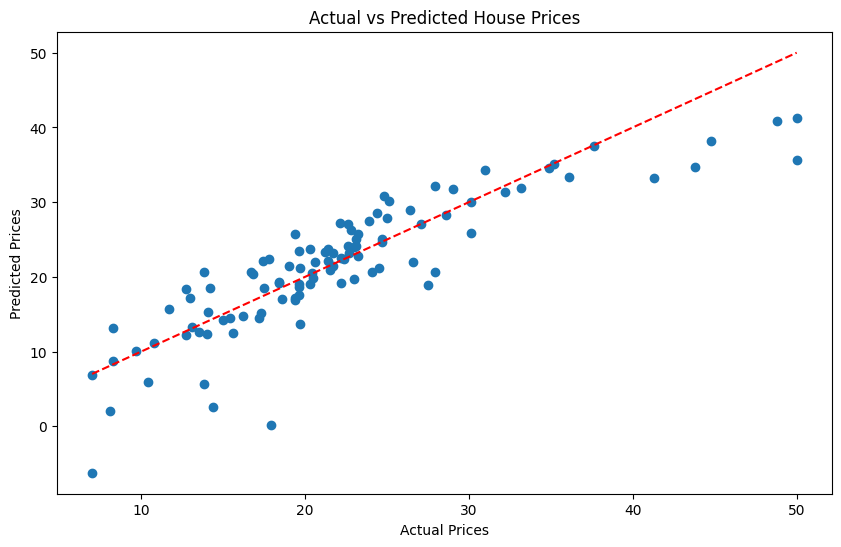

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

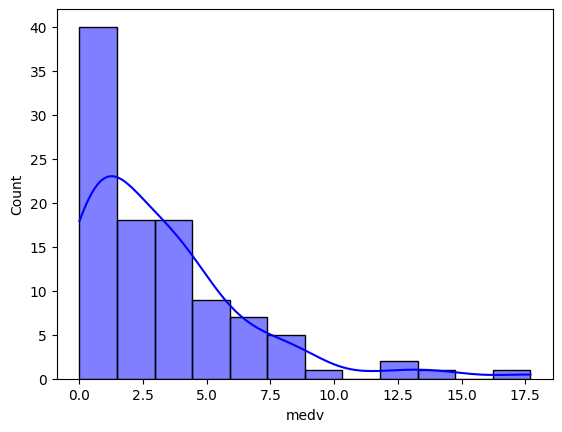

In [22]:
# Plot the residuals
residuals = abs(y_test - y_pred)
sns.histplot(residuals, kde=True, color='blue')
plt.show()

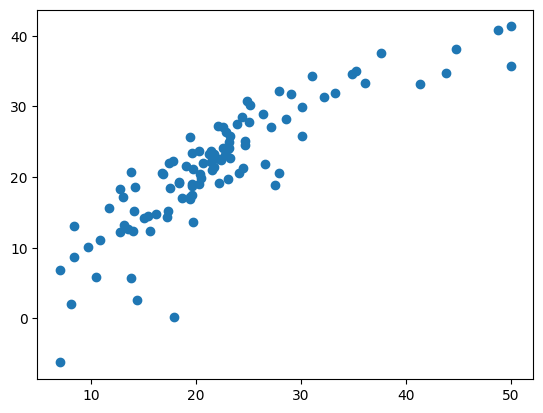

In [23]:
plt.scatter(y_test, y_pred)
plt.show()

In [24]:
# Preparing the data for training the model
Y = df['medv']
X = X = df[['rm', 'lstat','tax']]

In [25]:
# Split the data into training and testing model
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
# Make predictions
y_pred = model.predict(x_test)

In [28]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 3.63
Mean Squared Error: 24.56
Root Mean Squared Error: 4.96
R-squared: 0.69


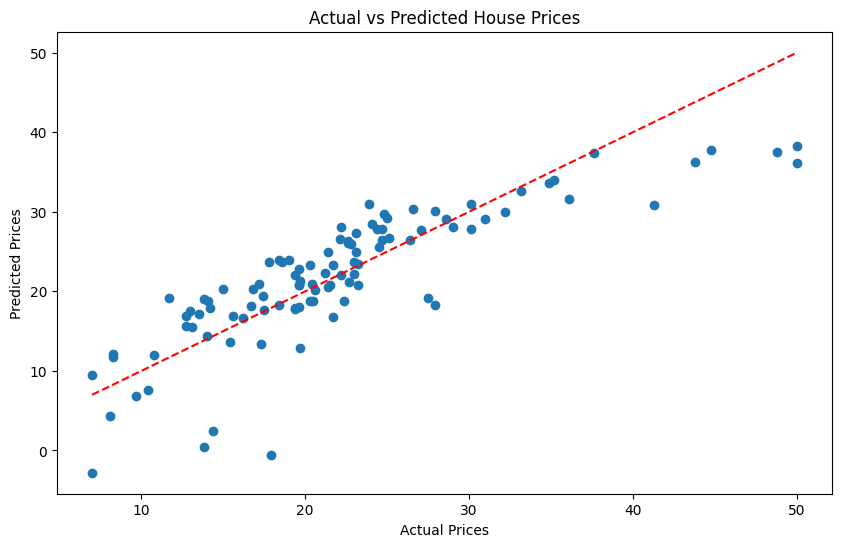

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [30]:
# Metric                         | Model 1 | Model 2 | better
# Mean Absolute Error (MAE)      | 3.21    | 3.63    | Model 1 (lower is better)
# Mean Squared Error (MSE)       | 20.90   | 24.56   | Model 1 (lower is better)
# Root Mean Squared Error (RMSE) | 4.57    | 4.96    | Model 1 (lower is better)
# R-squared (R²)                 | 0.73    | 0.69    | Model 1 (higher is better)
# Model 1 is better